In [1]:
from manipulation_library_dev import plot_compare_mapped_image_save, get_image, get_colors, OcrAnalysis 
import easyocr , os , ssl
import matplotlib.pyplot as plt
import numpy as np
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from glob import glob

In [3]:
reader = easyocr.Reader(['en'],gpu=True) # this needs to run only once to load the model into memory

In [ ]:
# 2nd Gather all the cropped parts from the images 

# %%
path_to_folder = "/".join(os.getcwd().split("/")[:-1])

# "output/Fragments_CoralChart/Dispenser_Project_Fragments_CoralChart/cropped_images/"
segment_enhanced = "output/Fragments_CoralChart/Dispenser_Project_Fragments_CoralChart/cropped_images/center_fragment"
path_absolute_to_image = os.path.join(path_to_folder,segment_enhanced)
segment_center_images = f"{path_absolute_to_image}/*.jpg"
list_of_center_segment_images_enhanced = glob(segment_center_images)

file_name = [ x.split("/")[-1].split("-center")[0] for x in list_of_center_segment_images_enhanced ]

# my_path = "output/Enhanced_Images_Dispenser_ImagingPAM_Fragments"
my_path = "output/Fragments_CoralChart/Dispenser_Project_Fragments_CoralChart/cropped_images"
path_to_images_folder = os.path.join(path_to_folder,my_path)
section = ["up","down","rigth","left"]
my_images ={}
for f_name in file_name:
    inner_dict = {} 
    for sec in section :
        image_path = os.path.join(path_to_images_folder, sec, f"{f_name}-{sec}.jpeg")
        if os.path.isfile( image_path): 
            inner_dict[sec] = image_path
        else : 
            print (f"file not found :{path_to_images_folder}/{sec}/{f_name}-{sec}.jpeg")
    if inner_dict :
         my_images[f_name] = inner_dict

In [5]:
# %% [markdown]
# Build the color chart 
# %%
custom_color_charts = {}
incomplete_to_fill = []
for f_name in file_name:
        my_personal_chart = {}
        # print(f_name)

        for sec in section :
            im =  my_images[f_name][sec]
            # print(im)
            result = reader.readtext(im)
            bboxes, text_list = OcrAnalysis.get_bounding_boxes(result)

            #if len(text_list) == 6 :
                #print(f_name,sec,len(text_list))

            image = get_image(im)

            for t,bbox in zip(text_list,bboxes):
                cropped_image = OcrAnalysis.get_pixels_above_bbox(bbox=bbox,image=image)
                df_color = get_colors(image=cropped_image, number_of_colors=1, show_chart=False)
                my_personal_chart[t]=tuple( round(x) for x in df_color["rgb_colors"][0].tolist() )

        if my_personal_chart:

            new_keys = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6']
            if len(new_keys) == len(my_personal_chart.keys()):
                my_personal_chart = {new_keys[i]: my_personal_chart[old_key] for i, old_key in enumerate(my_personal_chart)}
                my_personal_chart["Black"] = tuple([0,0,0])
                my_personal_chart["White"] = tuple([255,255,255])
                custom_color_charts[f_name] = my_personal_chart
            else :
                #print (f"not complete:{f_name}")
                incomplete_to_fill.append(f_name)


/ibex/user/barradd/Coral_project/env_dev/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1699449183005/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


In [6]:
# %%
my_custom_keys = [x for x in custom_color_charts.keys()]
for idx , f_name in enumerate (incomplete_to_fill):
    r_name = my_custom_keys[idx]
    print (f"filling {f_name} with {r_name}" )
#    #del custom_color_charts[f_name]
    custom_color_charts[f_name] ={ key:item for (key,item) in custom_color_charts[r_name].items()}

filling T0_CTRL_Night-3 with T0_BMC_Day-1
filling T1_CTRL_Night-4 with T1_BMC_Night-4


In [7]:
# %%
for im in list_of_center_segment_images_enhanced: 
    # print (im)
    # local_image = get_image(im)
    name = im.split("/")[-1]
    key = im.split("/")[-1].split("-center")[0]
    if key in custom_color_charts.keys():
        if len(custom_color_charts[key]) == 26:
            pass
        else:
            print (key,len(custom_color_charts[key]))

In [ ]:
outputs = "data/final/fragments_coral_chart_mapped_colors"
path_absolute_to_output = os.path.join(path_to_folder,outputs)
os.makedirs(path_absolute_to_output ,exist_ok=True)
# print (path_absolute_to_output)

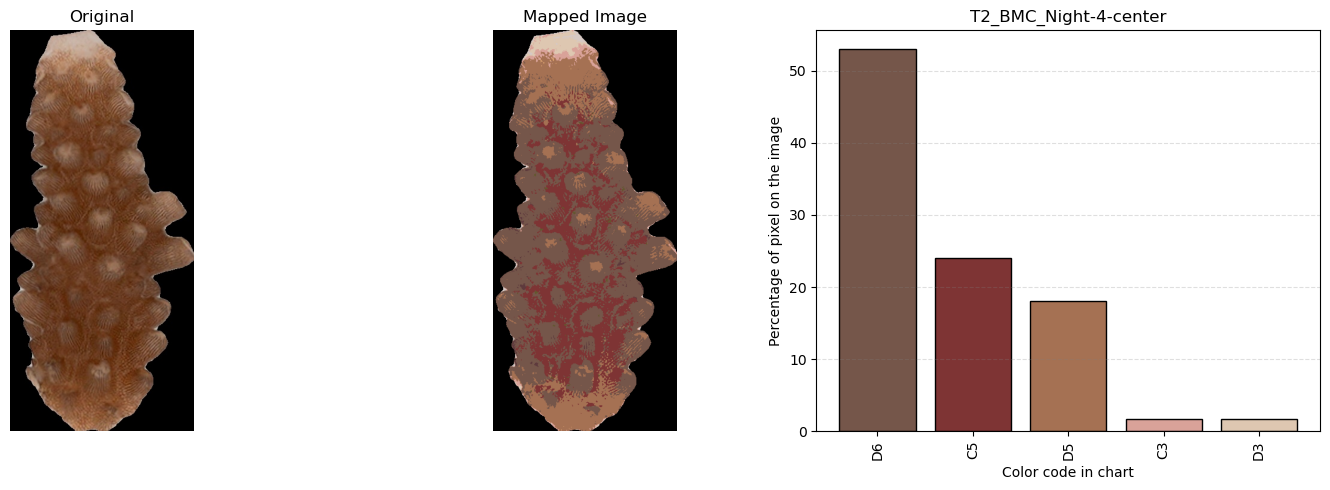

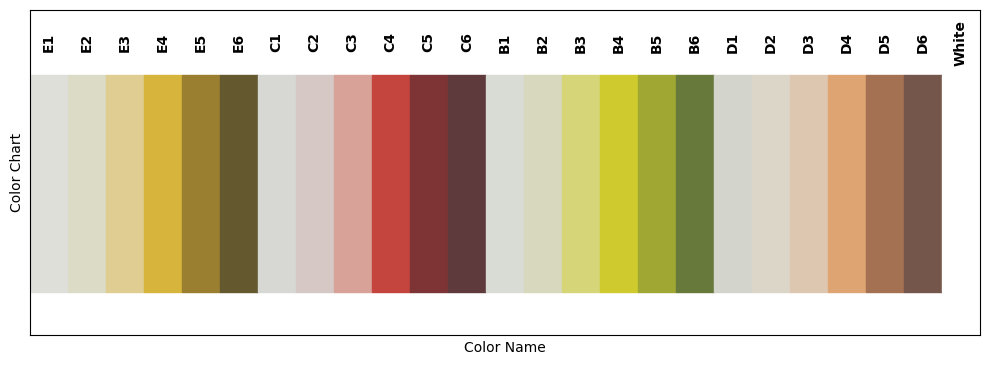

In [9]:
# %%
for im in list_of_center_segment_images_enhanced: 
#    # print (im)
    if "T2_BMC_Night-4" in im : 
        local_image = get_image(im)
        name = im.split("/")[-1]
        key = im.split("/")[-1].split("-center")[0]
        if len(custom_color_charts[key]) == 26:
            path_name = os.path.join(path_absolute_to_output,name)
            plot_compare_mapped_image_save( local_image,path_name,custom_color_charts[key])
            OcrAnalysis.plot_custom_colorchart(custom_color_charts["T2_BMC_Night-4"])
                        
        else:
            print (key,len(custom_color_charts[key]))
    
    # local_image = get_image(im)
    # name = im.split("/")[-1]
    # key = im.split("/")[-1].split("-center")[0]
    # if len(custom_color_charts[key]) == 26:
    #     path_name = os.path.join(path_absolute_to_output,name)
    #     plot_compare_mapped_image_save( local_image,path_name,custom_color_charts[key])
    # else:
    #     print (key,len(custom_color_charts[key]))

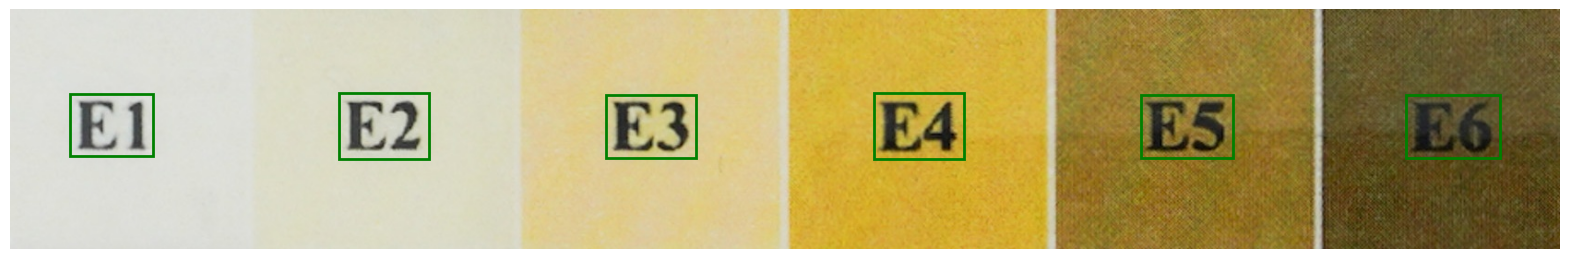

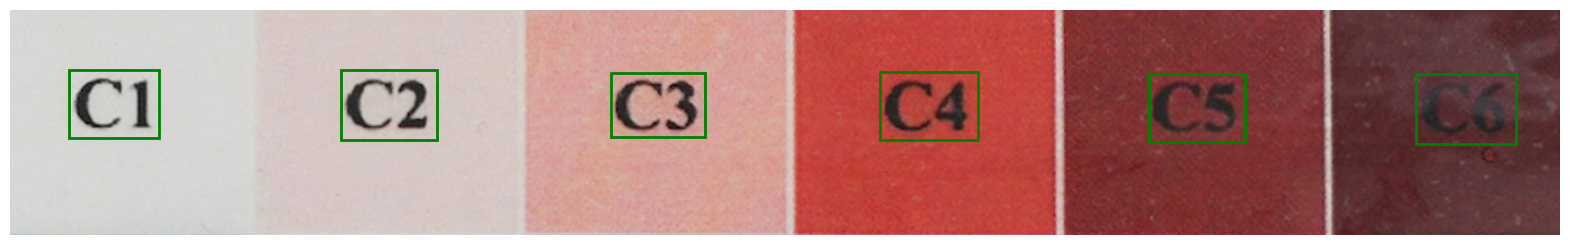

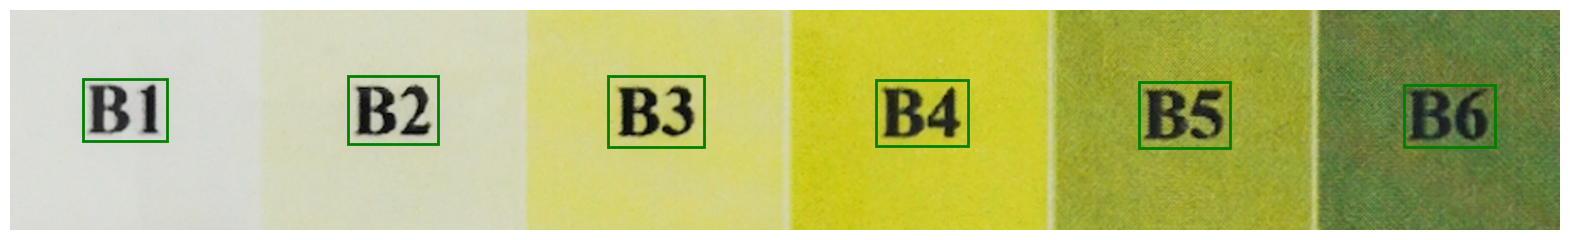

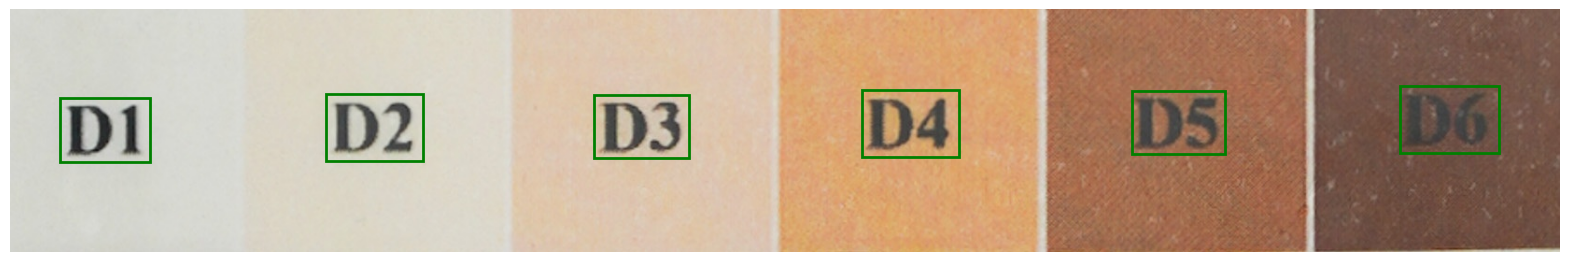

In [12]:
from manipulation_library import show_box
for sec in section :

    im =  my_images["T2_BMC_Night-4"][sec]
            # print(im)
    result = reader.readtext(im)
    bboxes, text_list = OcrAnalysis.get_bounding_boxes(result)

            #if len(text_list) == 6 :
                #print(f_name,sec,len(text_list))

    image = get_image(im)
    plt.figure(figsize=(20, 20))
    plt.imshow(image)
    # show_mask(masks[0], plt.gca())
    for input_box in bboxes : 
        show_box(input_box, plt.gca())


    plt.axis('off')
    plt.show()

            # for t,bbox in zip(text_list,bboxes):
            #     cropped_image = OcrAnalysis.get_pixels_above_bbox(bbox=bbox,image=image)
            #     df_color = get_colors(image=cropped_image, number_of_colors=1, show_chart=False)
            #     my_personal_chart[t]=tuple( round(x) for x in df_color["rgb_colors"][0].tolist() )


